In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


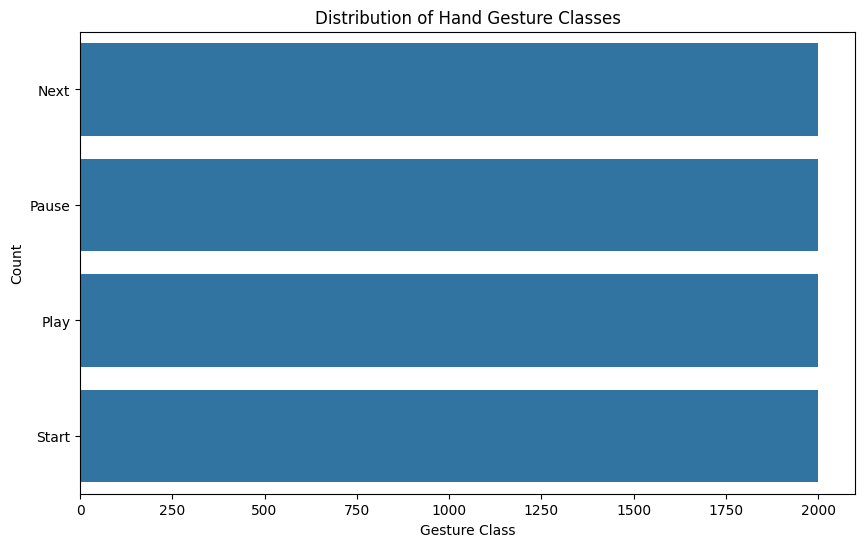

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Tải file CSV
df = pd.read_csv('/content/drive/MyDrive/Computer_Vision/Cuoi_Ky/hand_gesture_dataset.csv')

# Giả định: 42 cột đầu là đặc trưng, cột cuối là nhãn
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
plt.figure(figsize=(10, 6))
sns.countplot(y)
plt.title('Distribution of Hand Gesture Classes')
plt.xlabel('Gesture Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Làm sạch dữ liệu: loại bỏ dòng chứa NaN
df = df.dropna()

# Mã hoá nhãn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Chuẩn hoá dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)


In [ ]:
# Tạo mô hình MLP
model = Sequential([
    Dense(512, activation='elu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='elu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='elu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='elu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='elu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,676 (783.89 KB)

 Trainable params: 198,692 (776.14 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # nhỏ hơn mặc định để hội tụ ổn định hơn
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


# Đánh giá độ chính xác
loss, accuracy = model.evaluate(X_test, y_test)
print("✅ Test Accuracy:", accuracy)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8272 - loss: 0.4825 - val_accuracy: 0.9984 - val_loss: 0.0194 - learning_rate: 5.0000e-04
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9828 - loss: 0.0632 - val_accuracy: 0.9984 - val_loss: 0.0078 - learning_rate: 5.0000e-04
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9873 - loss: 0.0497 - val_accuracy: 0.9992 - val_loss: 0.0043 - learning_rate: 5.0000e-04
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9928 - loss: 0.0294 - val_accuracy: 1.0000 - val_loss: 7.4337e-04 - learning_rate: 5.0000e-04
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9929 - loss: 0.0296 - val_accuracy: 1.0000 - val_loss: 6.3974e-04 - learning_rate: 5.0000e-04
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9957 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 2.8118e-04 - learning_rate: 5.0000e-04
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Dự đoán trên tập test để tính precision, recall, f1-score
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Tính các chỉ số
precision = precision_score(y_test_classes, y_pred_classes, average='weighted') # Sử dụng 'weighted' vì đây là multi-class
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# In kết quả
print(f"\n🚀 Các chỉ số đánh giá:")
print(f"• Accuracy: {accuracy*100:.1f}%")
print(f"• Precision: {precision*100:.1f}%")
print(f"• Recall: {recall*100:.1f}%")
print(f"• F1-score: {f1*100:.1f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🚀 Các chỉ số đánh giá:
• Accuracy: 99.9%
• Precision: 99.9%
• Recall: 99.9%
• F1-score: 99.9%


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


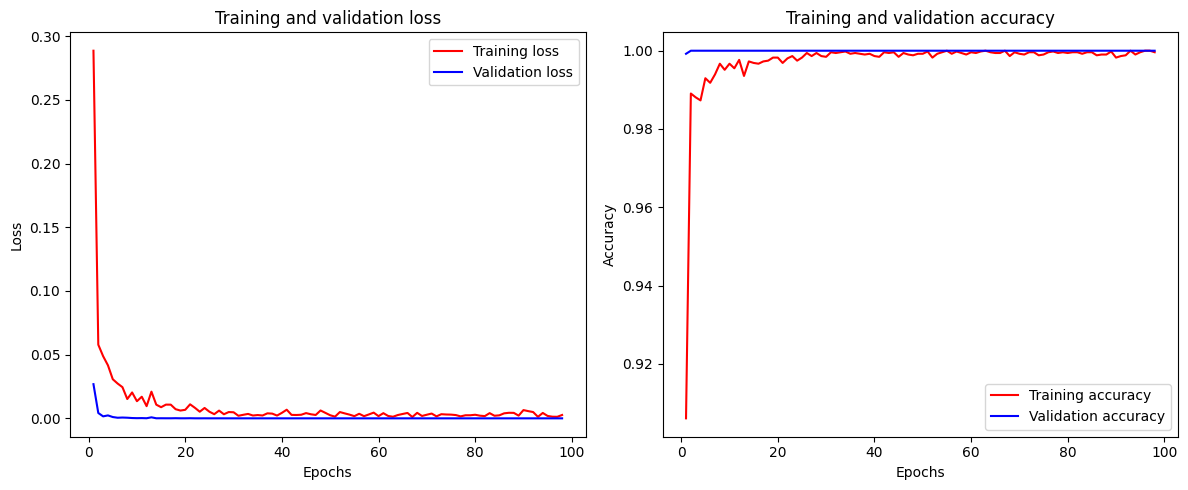

In [ ]:
# Lấy dữ liệu lịch sử của quá trình huấn luyện
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Vẽ biểu đồ Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Dự đoán nhãn trên tập test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.tight_layout()
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


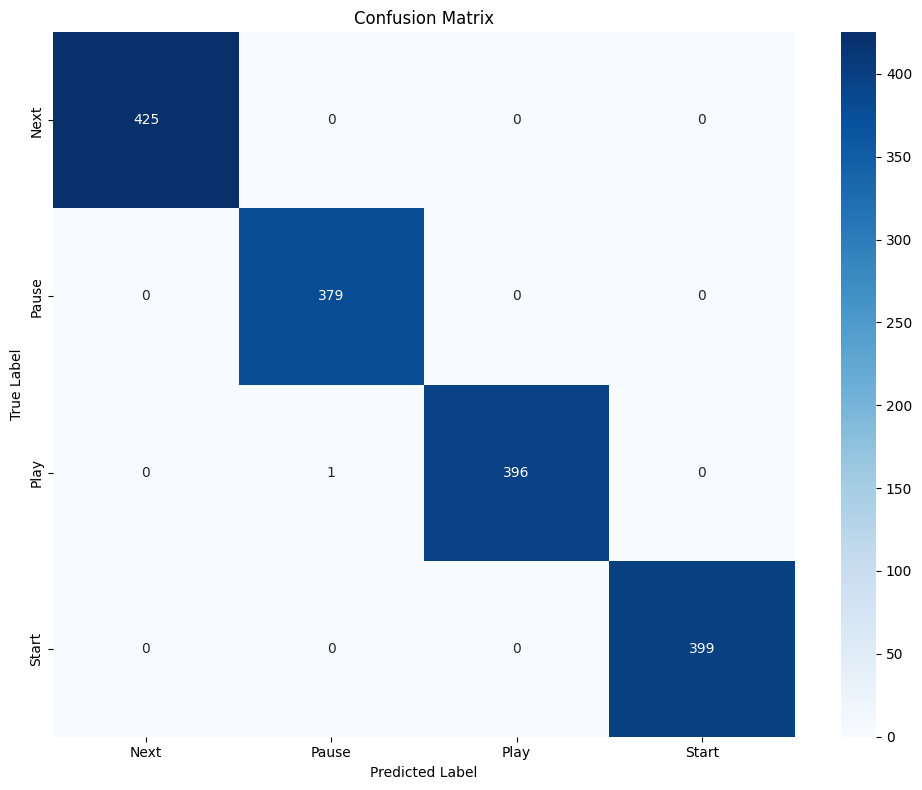

Label order: ['Next' 'Pause' 'Play' 'Start']


In [ ]:
# Tạo ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import numpy as np # Import numpy if not already imported in this cell

# Dự đoán nhãn trên tập test
# Move the definition of y_pred and y_true to this cell
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
# Ensure label_list is defined or replace with label_encoder.classes_ if appropriate
# If label_list is intended to be the class names from the encoder, you can define it like:
label_list = label_encoder.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

model.save("/content/drive/MyDrive/Computer_Vision/Cuoi_Ky/gesture_model_v8.h5")

# The label_encoder is already fitted earlier in the notebook.
# No need to re-fit it here.
# label_encoder = LabelEncoder()
# y_encoded = label_encoded = label_encoder.fit_transform(y)

import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f) # Use the already fitted label_encoder
print("Label order:", label_encoder.classes_)